In [ ]:
#importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle
from sklearn.preprocessing import LabelEncoder

print('------------')
print('### Python version: ' + __import__('sys').version)
print('### NumPy version: ' + np.__version__)
print('------------')

------------
### Python version: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
### NumPy version: 1.25.2
------------


In [ ]:
df = pd.read_csv('/content/Motor_Vehicle_Collisions.csv')

2 Provide main statistic about the dataset

In [ ]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765.0,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547.0,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903.0,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314.0,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(94315, 29)

In [ ]:

df.dtypes

CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                         float64
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED          int64
NUMBER OF PERSONS KILLED           int64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
COLLISION_ID                     float64
VEHICLE TYPE COD

In [ ]:
df.describe()

,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,61817.000000,86831.000000,86831.000000,94315.000000,94315.000000,94315.000000,94315.000000,94315.000000,94315.000000,94315.000000,94315.000000,9.431400e+04
mean,10893.884789,40.519262,-73.542953,0.482362,0.002672,0.070434,0.001081,0.046970,0.000191,0.340879,0.001241,4.458732e+06
std,522.689344,2.886263,5.237164,0.800904,0.053438,0.268812,0.033189,0.215351,0.013814,0.772584,0.037248,3.510335e+04
min,10000.000000,0.000000,-74.251860,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.456194e+06
25%,10457.000000,40.666041,-73.961682,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.430842e+06
50%,11208.000000,40.713963,-73.919590,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.454430e+06
75%,11238.000000,40.785105,-73.867470,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.486573e+06
max,11697.000000,40.912827,0.000000,18.000000,3.000000,6.000000,2.000000,3.000000,1.000000,18.000000,3.000000,4.702425e+06


3. Handle missing entries

In [ ]:
df.isna().sum()

CRASH DATE                           0
CRASH TIME                           0
BOROUGH                          32487
ZIP CODE                         32498
LATITUDE                          7484
LONGITUDE                         7484
LOCATION                          7484
ON STREET NAME                   25621
CROSS STREET NAME                50668
OFF STREET NAME                  68695
NUMBER OF PERSONS INJURED            0
NUMBER OF PERSONS KILLED             0
NUMBER OF PEDESTRIANS INJURED        0
NUMBER OF PEDESTRIANS KILLED         0
NUMBER OF CYCLIST INJURED            0
NUMBER OF CYCLIST KILLED             0
NUMBER OF MOTORIST INJURED           0
NUMBER OF MOTORIST KILLED            0
CONTRIBUTING FACTOR VEHICLE 1      469
CONTRIBUTING FACTOR VEHICLE 2    21309
CONTRIBUTING FACTOR VEHICLE 3    84623
CONTRIBUTING FACTOR VEHICLE 4    91687
CONTRIBUTING FACTOR VEHICLE 5    93514
COLLISION_ID                         1
VEHICLE TYPE CODE 1               1124
VEHICLE TYPE CODE 2      

In [ ]:
columns_to_remove = [
    'CONTRIBUTING FACTOR VEHICLE 2',
    'CONTRIBUTING FACTOR VEHICLE 3',
    'CONTRIBUTING FACTOR VEHICLE 4',
    'CONTRIBUTING FACTOR VEHICLE 5',
    'OFF STREET NAME',
    'LOCATION',
    'VEHICLE TYPE CODE 2',
    'VEHICLE TYPE CODE 3',
    'VEHICLE TYPE CODE 4',
    'VEHICLE TYPE CODE 5',
    'LATITUDE',
    'LONGITUDE',
    'CROSS STREET NAME',
    'COLLISION_ID'
]
df = df.drop(columns_to_remove, axis=1, errors='ignore')

In [ ]:
df.isna().sum()

CRASH DATE                           0
CRASH TIME                           0
BOROUGH                          32487
ZIP CODE                         32498
ON STREET NAME                   25621
NUMBER OF PERSONS INJURED            0
NUMBER OF PERSONS KILLED             0
NUMBER OF PEDESTRIANS INJURED        0
NUMBER OF PEDESTRIANS KILLED         0
NUMBER OF CYCLIST INJURED            0
NUMBER OF CYCLIST KILLED             0
NUMBER OF MOTORIST INJURED           0
NUMBER OF MOTORIST KILLED            0
CONTRIBUTING FACTOR VEHICLE 1      469
VEHICLE TYPE CODE 1               1124
dtype: int64

### Data Type Conversion

In [ ]:
df['CRASH DATETIME'] = pd.to_datetime(df['CRASH DATE'] + ' ' + df['CRASH TIME'])

df.drop(['CRASH DATE'], axis=1, inplace=True)

In [ ]:
df['CONTRIBUTING FACTOR VEHICLE 1'] = df['CONTRIBUTING FACTOR VEHICLE 1'].astype('object')
df['VEHICLE TYPE CODE 1'] = df['VEHICLE TYPE CODE 1'].astype('object')

In [ ]:
df['ZIP CODE'] = pd.to_numeric(df['ZIP CODE'], errors='coerce').fillna(-1).astype(int)

In [ ]:
df.dtypes

CRASH TIME                               object
BOROUGH                                  object
ZIP CODE                                  int64
ON STREET NAME                           object
NUMBER OF PERSONS INJURED                 int64
NUMBER OF PERSONS KILLED                  int64
NUMBER OF PEDESTRIANS INJURED             int64
NUMBER OF PEDESTRIANS KILLED              int64
NUMBER OF CYCLIST INJURED                 int64
NUMBER OF CYCLIST KILLED                  int64
NUMBER OF MOTORIST INJURED                int64
NUMBER OF MOTORIST KILLED                 int64
CONTRIBUTING FACTOR VEHICLE 1            object
VEHICLE TYPE CODE 1                      object
CRASH DATETIME                   datetime64[ns]
dtype: object

IMPUTING MISSING VALUES

In [ ]:
df = df.dropna(subset=['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED'])


categorical_columns = ['BOROUGH', 'ZIP CODE', 'ON STREET NAME', 'CONTRIBUTING FACTOR VEHICLE 1', 'VEHICLE TYPE CODE 1']
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)  # mode()

In [ ]:
df.isna().sum()

CRASH TIME                       0
BOROUGH                          0
ZIP CODE                         0
ON STREET NAME                   0
NUMBER OF PERSONS INJURED        0
NUMBER OF PERSONS KILLED         0
NUMBER OF PEDESTRIANS INJURED    0
NUMBER OF PEDESTRIANS KILLED     0
NUMBER OF CYCLIST INJURED        0
NUMBER OF CYCLIST KILLED         0
NUMBER OF MOTORIST INJURED       0
NUMBER OF MOTORIST KILLED        0
CONTRIBUTING FACTOR VEHICLE 1    0
VEHICLE TYPE CODE 1              0
CRASH DATETIME                   0
dtype: int64

In [ ]:
df.shape

(94315, 15)

In [ ]:
# Drop duplicates
df = df.drop_duplicates()
duplicates_after = df[df.duplicated()]
num_duplicates_after = duplicates_after.shape[0]
print("Number of duplicate rows after dropping:", num_duplicates_after)


Number of duplicate rows after dropping: 0


Handle mismatched string formats

In [ ]:
#convert to lowercase

df['CONTRIBUTING FACTOR VEHICLE 1'] = df['CONTRIBUTING FACTOR VEHICLE 1'].str.lower()

df['VEHICLE TYPE CODE 1'] = df['VEHICLE TYPE CODE 1'].str.lower()
df['BOROUGH'] = df['BOROUGH'].str.lower()
df['ON STREET NAME'] = df['ON STREET NAME'].str.lower()


<ipython-input-30-4d477cb1e352>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CONTRIBUTING FACTOR VEHICLE 1'] = df['CONTRIBUTING FACTOR VEHICLE 1'].str.lower()
<ipython-input-30-4d477cb1e352>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['VEHICLE TYPE CODE 1'] = df['VEHICLE TYPE CODE 1'].str.lower()
<ipython-input-30-4d477cb1e352>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [ ]:
df['CONTRIBUTING FACTOR VEHICLE 1'].str.count('unspecified').sum()


23777

Handle outliers

In [ ]:
df.nunique()

CRASH TIME                        1440
BOROUGH                              5
ZIP CODE                           201
ON STREET NAME                    4053
NUMBER OF PERSONS INJURED           17
NUMBER OF PERSONS KILLED             4
NUMBER OF PEDESTRIANS INJURED        6
NUMBER OF PEDESTRIANS KILLED         3
NUMBER OF CYCLIST INJURED            4
NUMBER OF CYCLIST KILLED             2
NUMBER OF MOTORIST INJURED          17
NUMBER OF MOTORIST KILLED            4
CONTRIBUTING FACTOR VEHICLE 1       55
VEHICLE TYPE CODE 1                254
CRASH DATETIME                   68667
dtype: int64

In [ ]:
column_name = 'NUMBER OF PERSONS INJURED'

value_counts = df[column_name].value_counts()
print("Unique Values and Counts for Column:", column_name)
for value, count in value_counts.items():
    print(f"{value}: {count}")

Unique Values and Counts for Column: NUMBER OF PERSONS INJURED
0: 60322
1: 26408
2: 5027
3: 1605
4: 552
5: 201
6: 75
7: 30
8: 14
9: 9
10: 5
18: 1
11: 1
17: 1
14: 1
15: 1
12: 1


In [ ]:
column_name = 'NUMBER OF PERSONS KILLED'

value_counts = df[column_name].value_counts()
print("Unique Values and Counts for Column:", column_name)
for value, count in value_counts.items():
    print(f"{value}: {count}")

Unique Values and Counts for Column: NUMBER OF PERSONS KILLED
0: 94010
1: 237
2: 6
3: 1


In [ ]:
column_name = 'NUMBER OF PEDESTRIANS INJURED'

value_counts = df[column_name].value_counts()
print("Unique Values and Counts for Column:", column_name)
for value, count in value_counts.items():
    print(f"{value}: {count}")

Unique Values and Counts for Column: NUMBER OF PEDESTRIANS INJURED
0: 87873
1: 6161
2: 191
3: 21
4: 6
6: 2


In [ ]:
column_name = 'NUMBER OF PEDESTRIANS KILLED'

value_counts = df[column_name].value_counts()
print("Unique Values and Counts for Column:", column_name)
for value, count in value_counts.items():
    print(f"{value}: {count}")

Unique Values and Counts for Column: NUMBER OF PEDESTRIANS KILLED
0: 94153
1: 100
2: 1


In [ ]:
column_name = 'NUMBER OF CYCLIST INJURED'

value_counts = df[column_name].value_counts()
print("Unique Values and Counts for Column:", column_name)
for value, count in value_counts.items():
    print(f"{value}: {count}")

Unique Values and Counts for Column: NUMBER OF CYCLIST INJURED
0: 89896
1: 4290
2: 64
3: 4


In [ ]:
column_name = 'NUMBER OF MOTORIST INJURED'

value_counts = df[column_name].value_counts()
print("Unique Values and Counts for Column:", column_name)
for value, count in value_counts.items():
    print(f"{value}: {count}")

Unique Values and Counts for Column: NUMBER OF MOTORIST INJURED
0: 72973
1: 14321
2: 4543
3: 1548
4: 542
5: 196
6: 68
7: 30
8: 14
9: 8
10: 5
18: 1
11: 1
16: 1
14: 1
15: 1
12: 1


In [ ]:
column_name = 'NUMBER OF MOTORIST KILLED'

value_counts = df[column_name].value_counts()

print("Unique Values and Counts for Column:", column_name)
for value, count in value_counts.items():
    print(f"{value}: {count}")

Unique Values and Counts for Column: NUMBER OF MOTORIST KILLED
0: 94143
1: 106
2: 4
3: 1


In [ ]:
# Group rare categories into 'Other'
threshold = 10
top_categories = df['VEHICLE TYPE CODE 1'].value_counts().index[:threshold]
df['VEHICLE TYPE CODE 1'] = df['VEHICLE TYPE CODE 1'].apply(lambda x: x if x in top_categories else 'Other')


In [ ]:
threshold = 22
top_categories = df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().index[:threshold]
df['CONTRIBUTING FACTOR VEHICLE 1'] = df['CONTRIBUTING FACTOR VEHICLE 1'].apply(lambda x: x if x in top_categories else 'Other')


In [ ]:
column_name = 'CONTRIBUTING FACTOR VEHICLE 1'

value_counts = df[column_name].value_counts()
print("Unique Values and Counts for Column:", column_name)
for value, count in value_counts.items():
    print(f"{value}: {count}")

Unique Values and Counts for Column: CONTRIBUTING FACTOR VEHICLE 1
unspecified: 23777
driver inattention/distraction: 22524
failure to yield right-of-way: 6486
following too closely: 6229
passing or lane usage improper: 4316
passing too closely: 3577
unsafe speed: 3468
backing unsafely: 2939
traffic control disregarded: 2742
other vehicular: 2551
Other: 2486
turning improperly: 2165
unsafe lane changing: 1945
driver inexperience: 1902
alcohol involvement: 1484
reaction to uninvolved vehicle: 1285
pedestrian/bicyclist/other pedestrian error/confusion: 913
view obstructed/limited: 812
pavement slippery: 767
aggressive driving/road rage: 707
fell asleep: 402
oversized vehicle: 391
brakes defective: 386


In [ ]:
df['CONTRIBUTING FACTOR VEHICLE 1'] = df['CONTRIBUTING FACTOR VEHICLE 1'].replace('unspecified', 'risky behavior')


In [ ]:
column_name = 'VEHICLE TYPE CODE 1'

value_counts = df[column_name].value_counts()

print("Unique Values and Counts for Column:", column_name)
for value, count in value_counts.items():
    print(f"{value}: {count}")

Unique Values and Counts for Column: VEHICLE TYPE CODE 1
sedan: 45902
station wagon/sport utility vehicle: 32792
Other: 4416
taxi: 2314
pick-up truck: 1923
box truck: 1591
bus: 1537
bike: 1372
e-bike: 918
motorcycle: 820
tractor truck diesel: 669


In [ ]:
def detect_outliers(df, columns):
    outlier_indices = []

    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)

    outlier_indices = list(set(outlier_indices))
    return outlier_indices

numerical_columns = [
    'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
    'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
    'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
    'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED'
]

outliers = detect_outliers(df, numerical_columns)
print("Outliers detected in the data:")
print(df.loc[outliers])
df_no_outliers = df.drop(outliers)


Outliers detected in the data:
      CRASH TIME    BOROUGH  ZIP CODE           ON STREET NAME  \
0           2:39   brooklyn        -1    whitestone expressway   
1          11:45   brooklyn        -1  queensboro bridge upper   
7           8:17      bronx     10475             belt parkway   
14         23:10     queens     11434     north conduit avenue   
16         20:03   brooklyn     11226             belt parkway   
...          ...        ...       ...                      ...   
94302      23:08     queens     11419             belt parkway   
94303      12:12  manhattan     10016           east 34 street   
94307      22:30   brooklyn        -1             belt parkway   
94311      20:21   brooklyn     11208            sutter avenue   
94314      11:29   brooklyn     11204             belt parkway   

       NUMBER OF PERSONS INJURED  NUMBER OF PERSONS KILLED  \
0                              2                         0   
1                              1                    

In [ ]:

df['WEEKEND'] = (df['CRASH DATETIME'].dt.dayofweek >= 5).astype(int)


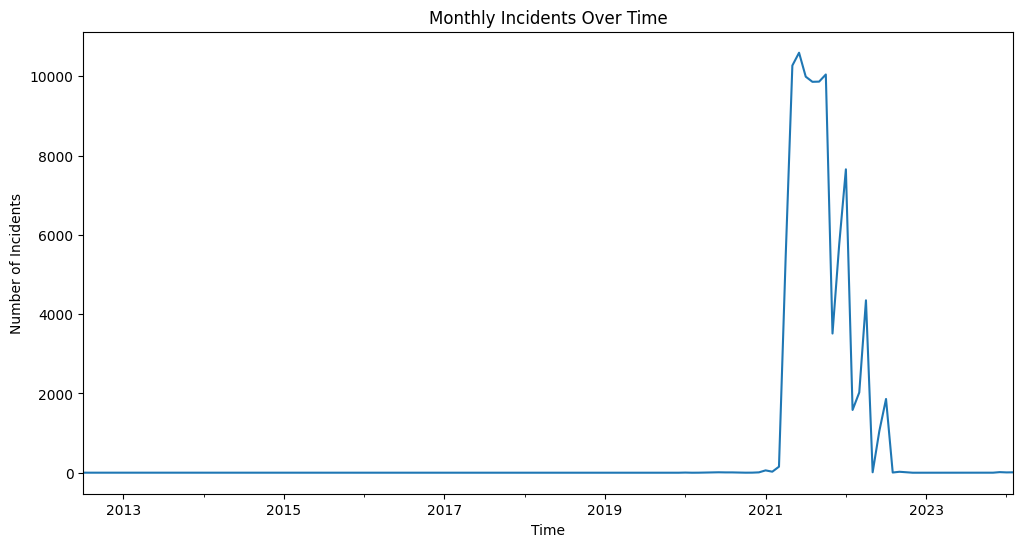

In [ ]:
# Time Series Line Chart for Incidents Over Time
plt.figure(figsize=(12, 6))
df['CRASH DATETIME'] = pd.to_datetime(df['CRASH DATETIME'])
df.resample('M', on='CRASH DATETIME').size().plot()
plt.title('Monthly Incidents Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Incidents')
plt.show()

In [ ]:
df.drop([ 'CRASH DATETIME'], axis=1, inplace=True)

In [ ]:
df['PERSONS KILLED'] = (df['NUMBER OF PERSONS KILLED'] > 0).astype(int)
df.drop(columns=['NUMBER OF PERSONS KILLED'], inplace=True)


In [ ]:
df['PERSONS INJURED'] = (df['NUMBER OF PERSONS INJURED'] > 0).astype(int)
df.drop(columns=['NUMBER OF PERSONS INJURED'], inplace=True)


In [ ]:

df['NUMBER OF MOTORIST INJURED'] = (df['NUMBER OF MOTORIST INJURED'] > 0).astype(int)


In [ ]:

df['NUMBER OF PEDESTRIANS INJURED'] = (df['NUMBER OF PEDESTRIANS INJURED'] > 0).astype(int)

Using any data visualization library

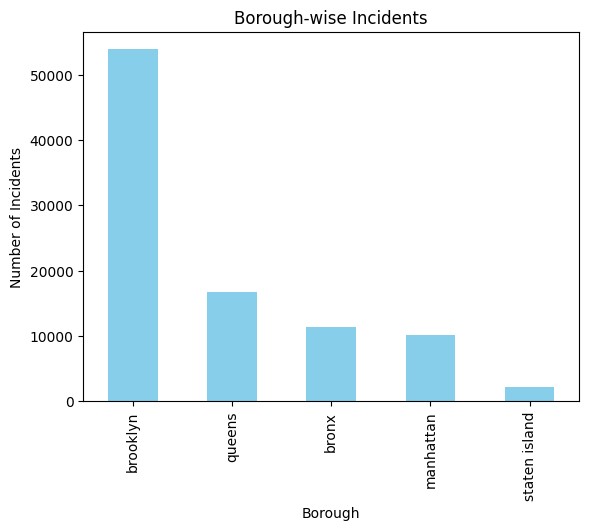

In [ ]:
# Bar Chart for Borough-wise Incidents
borough_counts = df['BOROUGH'].value_counts()
borough_counts.plot(kind='bar', color='skyblue')
plt.title('Borough-wise Incidents')
plt.xlabel('Borough')
plt.ylabel('Number of Incidents')
plt.show()

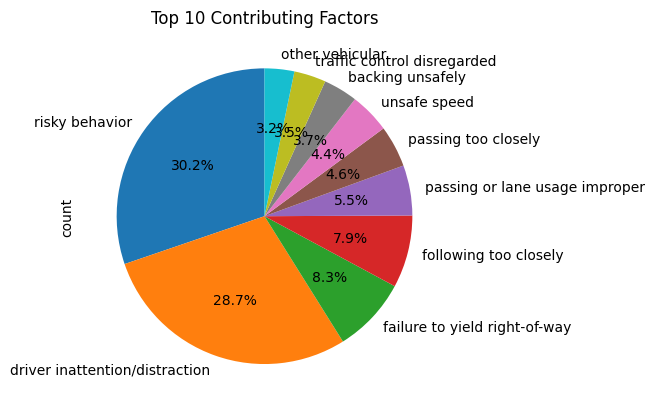

In [ ]:
contributing_factor_counts = df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(10)
contributing_factor_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Contributing Factors')
plt.show()

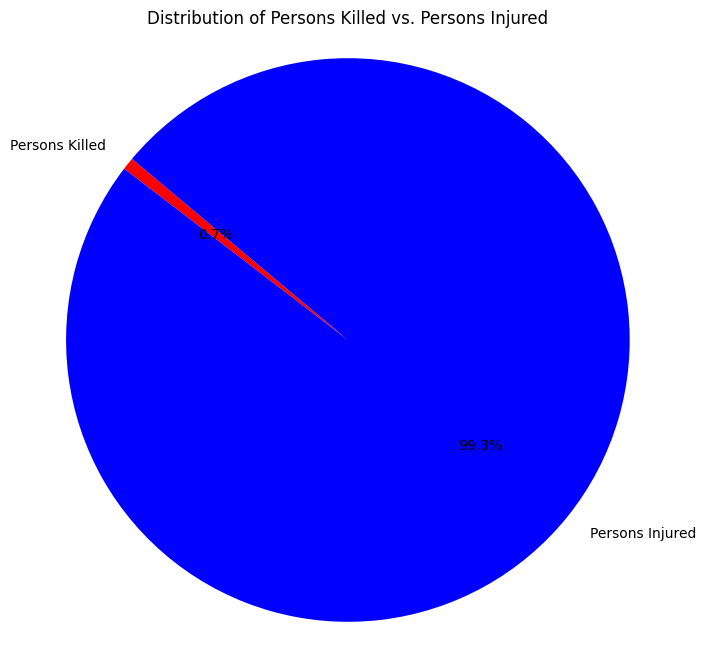

In [ ]:
total_killed = df['PERSONS KILLED'].sum()
total_injured = df['PERSONS INJURED'].sum()

labels = ['Persons Killed', 'Persons Injured']
sizes = [total_killed, total_injured]
colors = ['red', 'blue']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Persons Killed vs. Persons Injured')
plt.axis('equal')

plt.show()

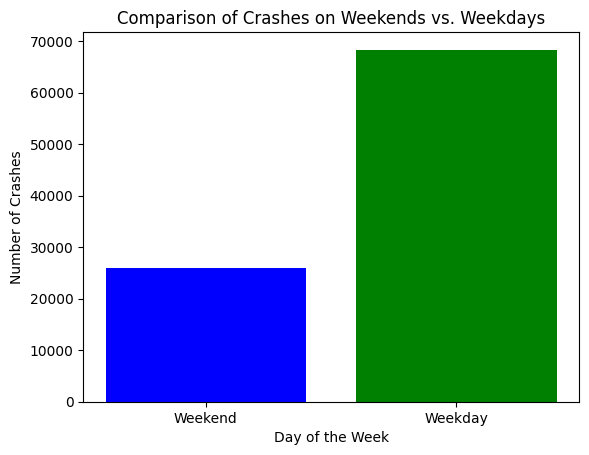

In [ ]:
weekend_crashes = df[df['WEEKEND'] == 1].shape[0]
weekday_crashes = df[df['WEEKEND'] == 0].shape[0]

categories = ['Weekend', 'Weekday']
crash_counts = [weekend_crashes, weekday_crashes]

plt.bar(categories, crash_counts, color=['blue', 'green'])
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crashes')
plt.title('Comparison of Crashes on Weekends vs. Weekdays')
plt.show()

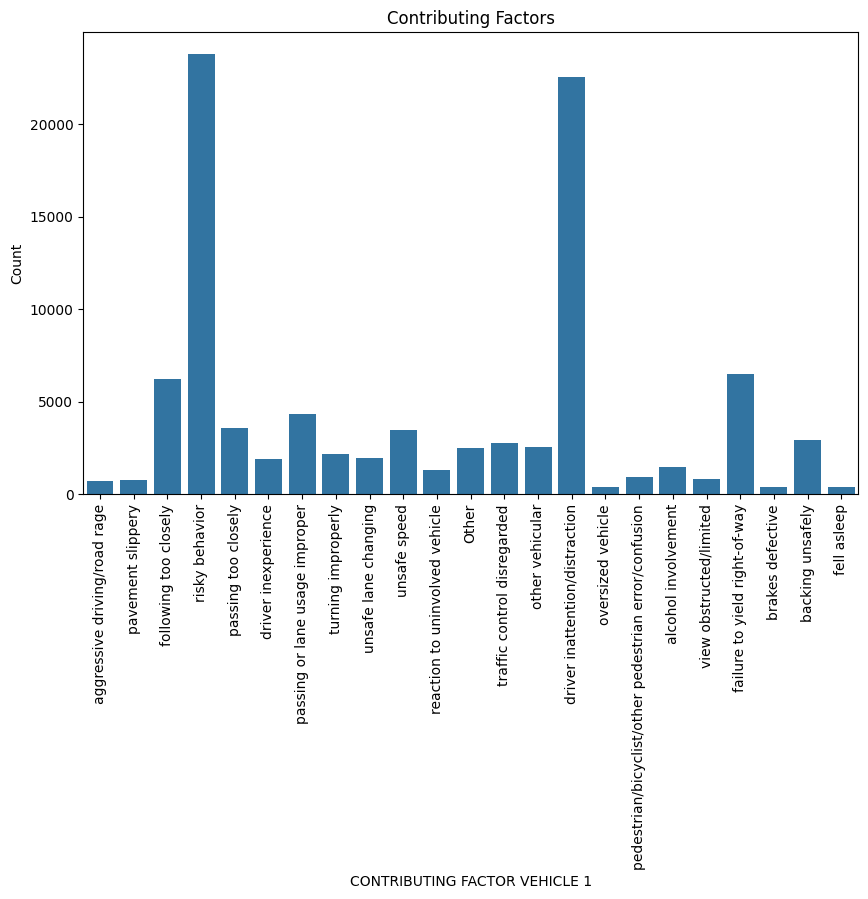

In [ ]:
# Visualization: Count plot for 'CONTRIBUTING FACTOR VEHICLE 1'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='CONTRIBUTING FACTOR VEHICLE 1')
plt.xlabel('CONTRIBUTING FACTOR VEHICLE 1')
plt.ylabel('Count')
plt.title('Contributing Factors')
plt.xticks(rotation=90)
plt.show()

<ipython-input-58-294acd7ca10e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='VEHICLE TYPE CODE 1', order=df['VEHICLE TYPE CODE 1'].value_counts().index, palette='Set2')


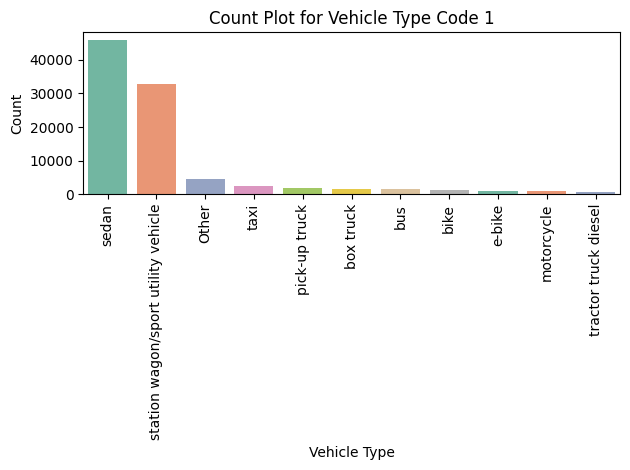

In [ ]:
sns.countplot(data=df, x='VEHICLE TYPE CODE 1', order=df['VEHICLE TYPE CODE 1'].value_counts().index, palette='Set2')

plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.title('Count Plot for Vehicle Type Code 1')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensures the plot fits within the figure
plt.show()

Class Imbalance

In [ ]:
class_counts = df['NUMBER OF PEDESTRIANS INJURED'].value_counts()
print(class_counts)

NUMBER OF PEDESTRIANS INJURED
0    87873
1     6381
Name: count, dtype: int64


In [ ]:
pip install -U imbalanced-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

X = df.drop(columns=['NUMBER OF PEDESTRIANS INJURED'])
y = df['NUMBER OF PEDESTRIANS INJURED']

undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

X_resampled, y_resampled = undersampler.fit_resample(X, y)

resampled_data = pd.DataFrame(X_resampled, columns=X.columns)
resampled_data['NUMBER OF PEDESTRIANS INJURED'] = y_resampled

df = resampled_data.copy()
print(df['NUMBER OF PEDESTRIANS INJURED'].value_counts())


NUMBER OF PEDESTRIANS INJURED
0    6381
1    6381
Name: count, dtype: int64


In [ ]:
print(X_resampled.shape, y_resampled.shape)


(12762, 14) (12762,)


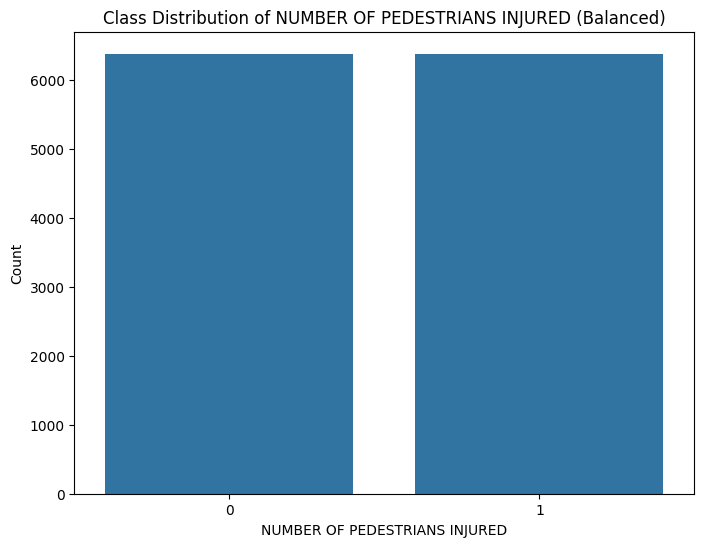

In [ ]:

# Plot the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='NUMBER OF PEDESTRIANS INJURED')
plt.title('Class Distribution of NUMBER OF PEDESTRIANS INJURED (Balanced)')
plt.xlabel('NUMBER OF PEDESTRIANS INJURED')
plt.ylabel('Count')
plt.show()
plt.show()


In [ ]:
df['CONTRIBUTING FACTOR VEHICLE 1'].unique()

array(['passing or lane usage improper', 'unsafe speed',
       'driver inattention/distraction', 'risky behavior',
       'pedestrian/bicyclist/other pedestrian error/confusion',
       'view obstructed/limited', 'alcohol involvement', 'Other',
       'traffic control disregarded', 'backing unsafely',
       'following too closely', 'turning improperly',
       'passing too closely', 'other vehicular',
       'failure to yield right-of-way', 'aggressive driving/road rage',
       'driver inexperience', 'reaction to uninvolved vehicle',
       'brakes defective', 'oversized vehicle', 'pavement slippery',
       'unsafe lane changing', 'fell asleep'], dtype=object)

In [ ]:
df['VEHICLE TYPE CODE 1'].unique()

array(['sedan', 'station wagon/sport utility vehicle', 'Other',
       'box truck', 'tractor truck diesel', 'taxi', 'bus',
       'pick-up truck', 'e-bike', 'motorcycle', 'bike'], dtype=object)

In [ ]:
df['BOROUGH'].unique()

array(['queens', 'manhattan', 'brooklyn', 'bronx', 'staten island'],
      dtype=object)

In [ ]:
df['NUMBER OF CYCLIST INJURED'].unique()

array([0, 1, 2])

In [ ]:
df = df.drop('CRASH TIME', axis=1)


### Encoding Categorical Variables

In [ ]:
import os
import pickle
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['BOROUGH', 'ON STREET NAME', 'CONTRIBUTING FACTOR VEHICLE 1', 'VEHICLE TYPE CODE 1']
encoders = {}

# Ensure the directory for storing the models exists
if not os.path.exists('models'):
    os.makedirs('models')

for col in categorical_columns:
    df[col] = df[col].astype(str)
    encoders[col] = LabelEncoder()
    df[col] = encoders[col].fit_transform(df[col])

    # Save each encoder to a .pkl file
    with open(f'models/{col}_encoder.pkl', 'wb') as file:
        pickle.dump(encoders[col], file)

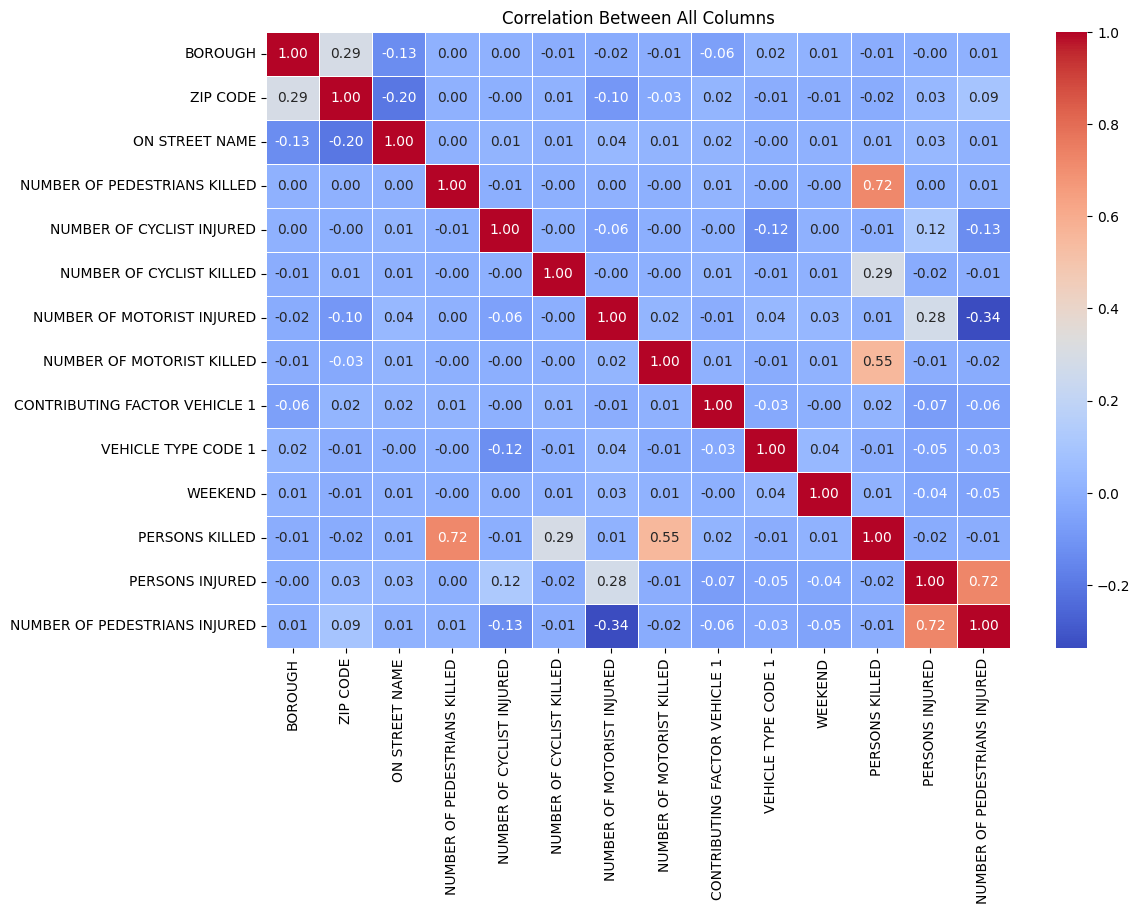

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between All Columns')
plt.show()

Train Test Split

In [ ]:
X = df.drop([
    'NUMBER OF PEDESTRIANS INJURED',
    'PERSONS INJURED',
    'ZIP CODE',
    'ON STREET NAME',
    'NUMBER OF PEDESTRIANS KILLED',
    'NUMBER OF CYCLIST KILLED',
    'NUMBER OF MOTORIST KILLED',
    'PERSONS KILLED'
], axis=1)
y = df['NUMBER OF PEDESTRIANS INJURED']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)


In [ ]:
print("Shapes of the datasets:")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"X_val shape: {X_val.shape}")  # X_val represents the validation features
print(f"y_val shape: {y_val.shape}")  # y_val represents the validation target


Shapes of the datasets:
X_train shape: (7656, 6)
y_train shape: (7656,)
X_test shape: (2553, 6)
y_test shape: (2553,)
X_val shape: (2553, 6)
y_val shape: (2553,)


# STEP 2

Logistic Regression

In [ ]:
warnings.filterwarnings('ignore')

rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest accuracy: {rf_accuracy * 100}%")

Random Forest accuracy: 71.13200156678417%


In [ ]:
!pip install xgboost


In [ ]:
from xgboost import XGBClassifier, XGBRegressor

In [ ]:
warnings.filterwarnings('ignore')

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=0)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print(f"XGBoost accuracy: {xgb_accuracy * 100}%")

XGBoost accuracy: 72.58127692910301%


In [ ]:
warnings.filterwarnings('ignore')
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree accuracy: {dt_accuracy * 100}%")

Decision Tree accuracy: 70.54445750097923%


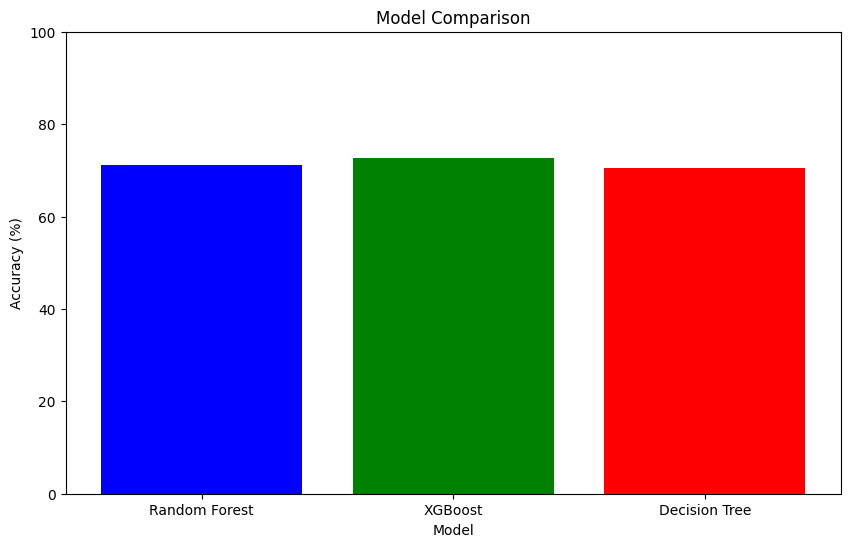

In [ ]:
model_names = ['Random Forest', 'XGBoost', 'Decision Tree']
model_accuracies = [rf_accuracy * 100, xgb_accuracy * 100, dt_accuracy * 100]

plt.figure(figsize=(10, 6))
plt.bar(model_names, model_accuracies, color=['blue', 'green', 'red'])
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.ylim([0, 100])
plt.show()
